## Try to compare the PV Watts prediction with exactly biszmuth and tilt

In [38]:
import numpy as pd
import pandas as pd
import requests 
import matplotlib.pyplot as plt

In [29]:
Breeze = pd.read_csv('../Cleaned_data/new one/309Breeze.csv')
Huffman = pd.read_csv('../Cleaned_data/new one/12800Huffman.csv')
Wildwood = pd.read_csv('../Cleaned_data/new one/1957Wildwood.csv')
Tahneeta = pd.read_csv('../Cleaned_data/new one/10611Tahneeta.csv')

In [33]:
Huffman

,Date/Time,Energy Produced (Wh)
0,2017-05-31 00:00:00 -0800,11641
1,2017-06-01 00:00:00 -0800,24026
2,2017-06-02 00:00:00 -0800,23821
3,2017-06-03 00:00:00 -0800,21138
4,2017-06-04 00:00:00 -0800,8250
5,2017-06-05 00:00:00 -0800,11954
6,2017-06-06 00:00:00 -0800,9448
7,2017-06-07 00:00:00 -0800,12548
8,2017-06-08 00:00:00 -0800,10296
9,2017-06-09 00:00:00 -0800,13886


In [26]:
list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 2.9, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 28, "azimuth": 180, "lat": 61.109, "lon": -149.87, "dataset": 'tmy2'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
tmy2 = pd.DataFrame(data = json_response['outputs'])

In [25]:
list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 2.9, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 28, "azimuth": 180, "lat": 61.109, "lon": -149.87, "dataset": 'tmy3'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
tmy3 = pd.DataFrame(data = json_response['outputs'])

In [24]:
a = Breeze['Energy Produced (Wh)'][0:364].sum()/1000
b = Breeze['Energy Produced (Wh)'][265:720].sum()/1000
print(a)
print(b)

1629.921
1747.99


In [28]:
print(tmy2['ac_annual'][0])
print(tmy3['ac_annual'][0])

2605.189453125
3160.24072265625


In [30]:
list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 3.6, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 25, "azimuth": 180, "lat": 61.109, "lon": -149.87, "dataset": 'tmy2'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
tmy2 = pd.DataFrame(data = json_response['outputs'])

list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 3.6, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 25, "azimuth": 180, "lat": 61.109, "lon": -149.87, "dataset": 'tmy2'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
tmy2 = pd.DataFrame(data = json_response['outputs'])

In [31]:
print(tmy2['ac_annual'][0])
print(tmy3['ac_annual'][0])

3193.73046875
3160.24072265625


In [41]:
a = Huffman['Energy Produced (Wh)'][0:364].sum()/1000
b = Huffman['Energy Produced (Wh)'][365:694].sum()/1000
print(a)
print(b)

2371.998
2084.562


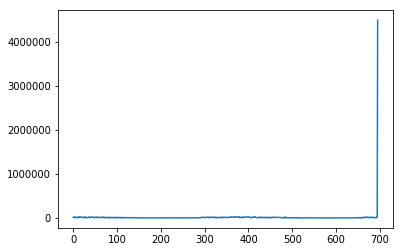

In [39]:
plt.plot(Huffman['Energy Produced (Wh)'])